# The Sparks Foundation GRIP

## Data Science And Business Analytics Internship

## Exploratory Data Analysis - Global Terrorism

## Author :- Rahul Prasad

### Task 4:- Perform The 'Exploratory Data Analysis' on Dataset 'Global Terrorism'

### Step 1:- Importing Important Libraries

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print('Libraries Imported Successfully')

Libraries Imported Successfully


### Step 2:- Loading The Dataset

In [4]:
df = pd.read_csv('terrorism.csv', encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Step 3:- Understanding The Dataset

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.shape

(181691, 135)

In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Renaming the columns so that it is easy to understand the dataset
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [10]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

### Step 4:- Exploring the dataset

In [13]:
# Top 10 Countries with highest number of attacks
print('Country With Most Number Of Attacks:', df['Country'].value_counts().head(10))

Country With Most Number Of Attacks: Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


In [17]:
# States with highest number of attacks
print('State with the most attacks: ',df['state'].value_counts())

State with the most attacks:  Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: state, Length: 2855, dtype: int64


In [26]:
# Region with highest number of attacksprint
("Region with the most attacks: ",df['Region'].value_counts())

('Region with the most attacks: ',
 Middle East & North Africa     50474
 South Asia                     44974
 South America                  18978
 Sub-Saharan Africa             17550
 Western Europe                 16639
 Southeast Asia                 12485
 Central America & Caribbean    10344
 Eastern Europe                  5144
 North America                   3456
 East Asia                        802
 Central Asia                     563
 Australasia & Oceania            282
 Name: Region, dtype: int64)

In [20]:
# Cities with highest number of attacks
print("Cities with the most attacks: ",df['city'].value_counts())

Cities with the most attacks:  Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64


In [27]:
# Year with highest number of attacks
print("Year with the most attacks:",df['Year'].value_counts().head(10))

Year with the most attacks: 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


In [28]:
# Most Frequent Attack Types
print("Most Frequent Attack Types:",df['AttackType'].value_counts())

Most Frequent Attack Types: Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


In [29]:
# Group with most attacks
print("Group with the most attacks:",df['Group'].value_counts().head())

Group with the most attacks: Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


In [30]:
# Weapon which is most popular
print("Most popular Weapon Type :",df['Weapon_type'].value_counts().head())

Most popular Weapon Type : Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64


### Step 5:- Visualizing The Dataset

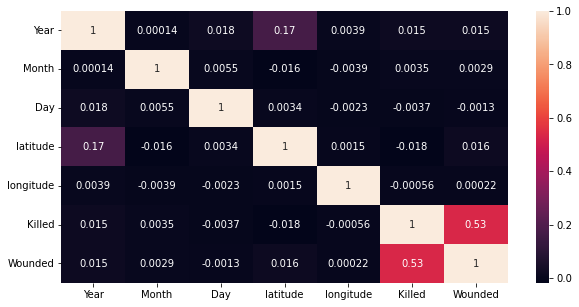

In [31]:
# Creating a HearMap
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

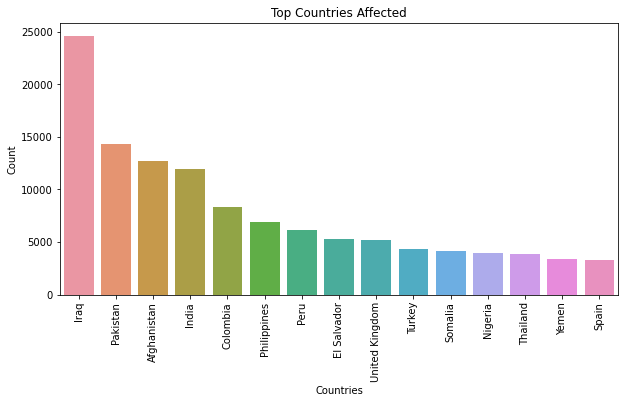

In [32]:
# Creating A Bar PLot to understand which country is affected the most
plt.figure(figsize = (10,5))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


#### By Visualizing the above bar plot IRAQ is the most affected country

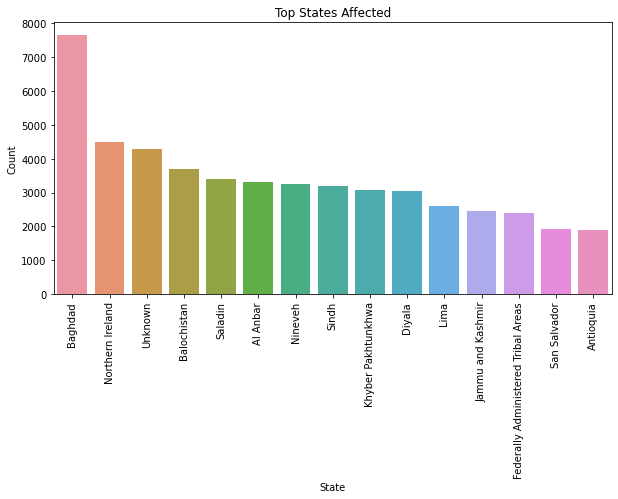

In [35]:
# Creating A Bar PLot to understand which state is affected the most
plt.figure(figsize = (10,5))
sns.barplot(df['state'].value_counts()[:15].index,df['state'].value_counts()[:15].values)
plt.title('Top States Affected')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### By Visualizing the above bar plot BAGHDAD is the most affected state

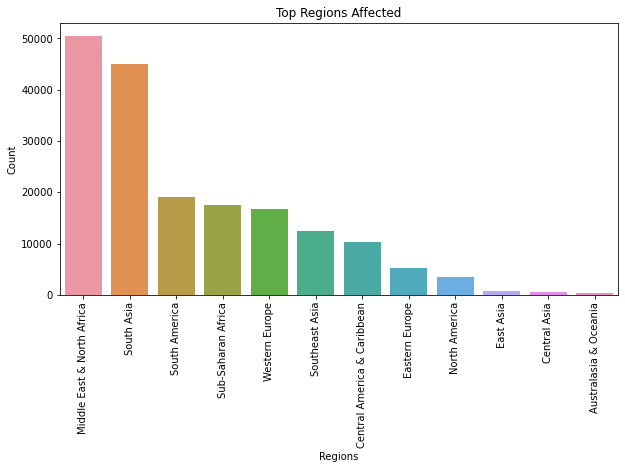

In [36]:
# Creating A Bar PLot to understand which region is affected the most
plt.figure(figsize = (10,5))
sns.barplot(df['Region'].value_counts()[:15].index,df['Region'].value_counts()[:15].values)
plt.title('Top Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### By Visualizing The Bar Plot We understand that MIDDLE EAST AND NORTH AFRICA is the most affected region

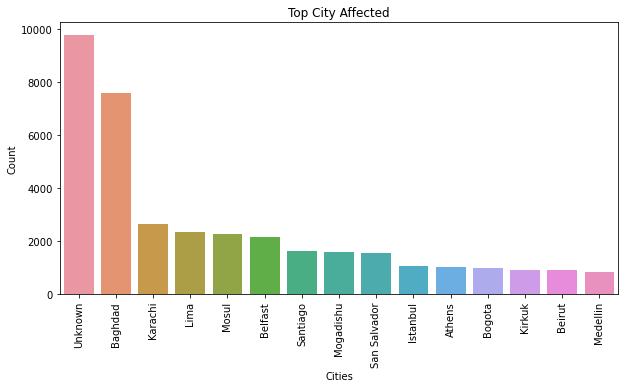

In [37]:
# # Creating A Bar PLot to understand which city is affected the most
plt.figure(figsize = (10,5))
sns.barplot(df['city'].value_counts()[:15].index,df['city'].value_counts()[:15].values)
plt.title('Top City Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


#### By Visualizing The Above Bar Plot We Understand That Most Affected City is Baghdad As The First One Is Unknown

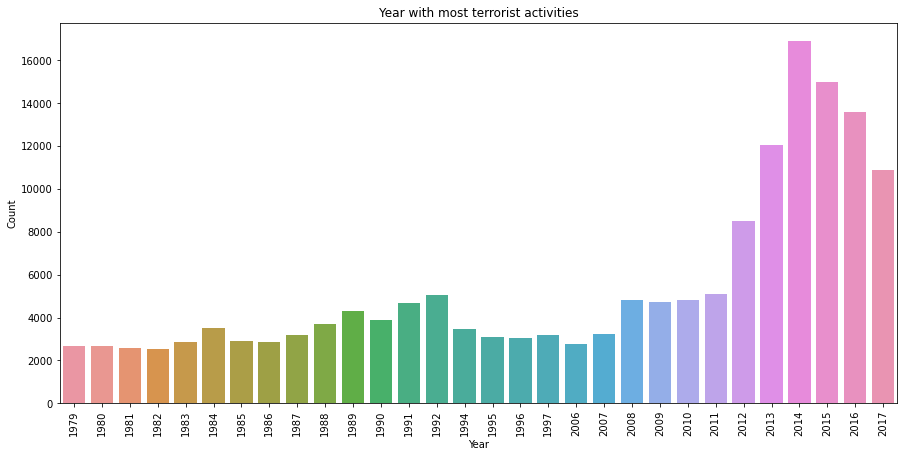

In [39]:
# Creating A Bar PLot to understand which Year is affected the most
plt.figure(figsize = (15,7))
sns.barplot(df['Year'].value_counts()[:30].index,df['Year'].value_counts()[:30].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### By Visualizing The Plot We Understand That Year 2014 Has Been Affected The Most

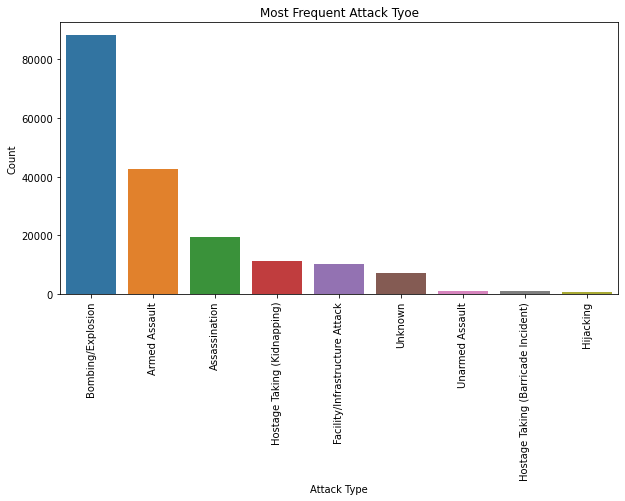

In [41]:
# # Creating A Bar PLot to understand which attack is more frequent 
plt.figure(figsize = (10,5))
sns.barplot(df['AttackType'].value_counts()[:15].index,df['AttackType'].value_counts()[:15].values)
plt.title('Most Frequent Attack Tyoe')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Most frequent Attack Type is Bombing / Explosion.

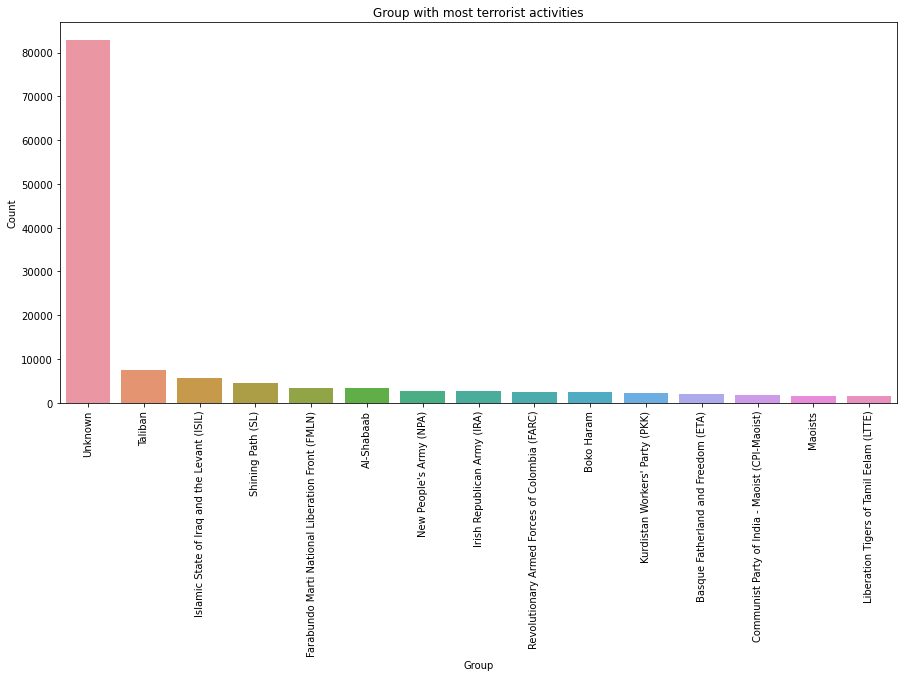

In [43]:
# Creating A Bar PLot to understand which group with most terrorist activities 
plt.figure(figsize = (15,7))
sns.barplot(df['Group'].value_counts()[:15].index,df['Group'].value_counts()[:15].values)
plt.title('Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### The most frequent group in past terror attacks is taliban since the first is unknown

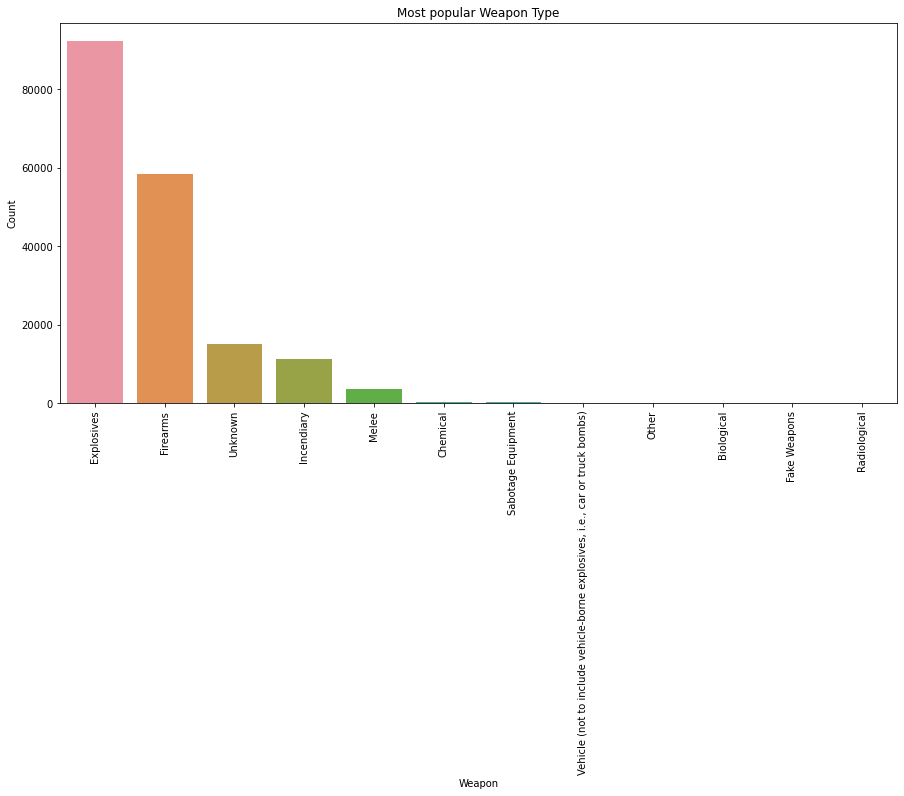

In [45]:
# Creating A Bar plot to understand the most popular weapon_type
plt.figure(figsize = (15,7))
sns.barplot(df['Weapon_type'].value_counts()[:15].index,df['Weapon_type'].value_counts()[:15].values)
plt.title('Most popular Weapon Type')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Most popular weapon type is explosives.

### Killed VS Wounded Visualization

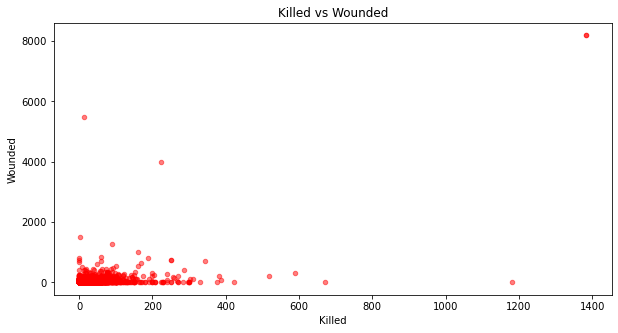

In [47]:
df.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 0.5, color = 'red', figsize = (10,5))
plt.xlabel('Killed')
plt.ylabel('Wounded')
plt.title('Killed vs Wounded')
plt.show()


### Step 6:- Conclusion

##### 1. Most affected countries are Iraq, Pakistan and Afganistan.
##### 2. Most affected state is Baghdad
##### 3. Most affected region is Middle East and North Africa
##### 4. Most affected year in the past is 2014

### Insights drawn
##### 1. The most frequent attack type is Bombing/Explosion so people need to practice a little alertness in crowded places.
##### 2. The most popular weapon is explosives.